# Generative Adversarial Networks

In this notebook, I go back in history to re-explore GANs.  GANs were first created almost 12 years ago. Generative models have advanced greatly in the past decade, at an extremely rapid pace that it is humanly impossible to keep track of all the developments. But what I can certainly do is to revisit the foundations from time to time and understand the challenges these primitive models experienced that drove the field towards its current state. Perhaps I may rediscover a trick or two that could come handy with current development.

In this exercise I will training a simple network described in the HOML book, but I will be using PyTorch. I have the 3rd edition of that book and it uses Tensorflow. The latest edition of book uses PyTorch, but since I don't have it, I will be doing the translation by myself.

## Synopsis
1. Dataset & Dataloader Setup
2. Model class definition
3. Training loop setup
4. Samples generation
5. Conclusion

## Dataset & Dataloader setup

I have my own personal repository of standard datasets at https://datasets.sambeet.com. I will be fetching the FashionMNIST dataset for this exercise.

In [9]:
# Downloading the dataset and storing it in a temporary directory
!mkdir tmp
!wget "https://datasets.sambeet.com/fashion-mnist.tar.gz" -P tmp/

--2026-02-04 21:31:43--  https://datasets.sambeet.com/fashion-mnist.tar.gz
Resolving datasets.sambeet.com (datasets.sambeet.com)... 2606:4700:3035::6815:470b, 2606:4700:3032::ac43:a8f9, 104.21.71.11, ...
Connecting to datasets.sambeet.com (datasets.sambeet.com)|2606:4700:3035::6815:470b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30897664 (29M) [application/gzip]
Saving to: ‘tmp/fashion-mnist.tar.gz’

fashion-mnist.tar.g 100%[===================>]  29.47M  12.4MB/s    in 2.4s    

2026-02-04 21:31:45 (12.4 MB/s) - ‘tmp/fashion-mnist.tar.gz’ saved [30897664/30897664]



In [12]:
# Extract contents of tar file 
!tar -xvf tmp/fashion-mnist.tar.gz

x fashion-mnist/
x fashion-mnist/t10k-images-idx3-ubyte.gz
x fashion-mnist/train-images-idx3-ubyte.gz
x fashion-mnist/train-labels-idx1-ubyte.gz
x fashion-mnist/t10k-labels-idx1-ubyte.gz


In [37]:
import gzip
import torch
import matplotlib.pyplot as plt

In [63]:
with gzip.open('datasets/fashion-mnist/t10k-labels-idx1-ubyte.gz') as f:
    #f.read(4) # Magic
    num_images = f.read()[15] # Number of images
    #num_rows = int.from_bytes(f.read(4), byteorder='big') # Number of rows
    #num_cols = int.from_bytes(f.read(4), byteorder='big') # Number of columns
    #buffer = f.read(num_images * num_rows * num_cols)
    #data = torch.frombuffer(buffer, dtype=torch.uint8).reshape(num_images, num_rows, num_cols)
    print(f"num images: {num_images}")

num images: 6


In [54]:
del num_images
del num_rows
del num_cols

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

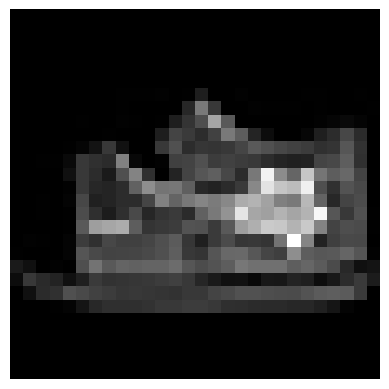

In [47]:
plt.imshow(data[9999], cmap='grey')
plt.axis('off')

In [67]:
from torch.utils.data import Dataset, DataLoader
import os

In [93]:
class FashionDataset(Dataset):
    def __init__(self, root='datasets/fashion-mnist', test=False):
        self.test = test
        if not self.test:
            self.data_file = os.path.join(root, 'train-images-idx3-ubyte.gz')
            self.label_file = os.path.join(root, 'train-labels-idx1-ubyte.gz')
        else:
            self.data_file = os.path.join(root, 't10k-images-idx3-ubyte.gz')
            self.label_file = os.path.join(root, 't10k-labels-idx1-ubyte.gz')

    def __len__(self):
        with gzip.open(self.label_file, 'rb') as f:
            return int.from_bytes(f.read()[4:8], byteorder='big')

    def __getitem__(self, id):
        image_size = 28 * 28
        image_offset = 16 + id * image_size
        label_offset = 8 + id

        with gzip.open(self.data_file, 'rb') as f:
            f.seek(image_offset)
            buffer = f.read(image_size)
            data = torch.frombuffer(buffer, dtype=torch.uint8).clone().reshape(28, 28)

        with gzip.open(self.label_file, 'rb') as f:
            f.seek(label_offset)
            label = f.read(1)[0]

        return data, label

In [94]:
data = FashionDataset(test=False)

In [95]:
data.__len__()

60000

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

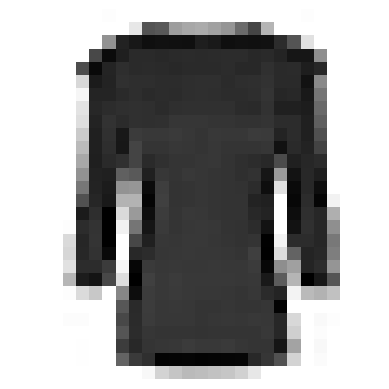

In [104]:
i, l = data.__getitem__(55000)
plt.imshow(255 - i, cmap='gray')
plt.axis('off')